- We met with Sofiya and Boian on May 12, 2023
- Boian had provided sofiya with top 100 genes for 12 clusters/metagenes that were derived from SARS-CoV-2 dataset. Genes were ranked on based on their probablity score.
- Sofiya wanted to provide biological context to these metagenes.
- Boian suggested we use DAVID (https://david.ncifcrf.gov/).
- I was not very familiar with this tool before, but seems rather useful to enrich your downstream interpretation of any rna seq analyses.
- But for this analyses, I took those top 100 genes and mapped DAVID annotations to it.
- There are multiple different ways to obtain DAVID data. One can use an API, use the website, or just download their data. I downloaded the data.
- Downloaded data can be found in `data` folder of this repo within `DAVIDKnowledgebase` folder. All of them are mostly two column files where first column is gene id `ENSG` and second column is the metadata associated with the gene.
- I took the top 100 genes and then joined to these metadata.
- I have only done it for few categories associated with Functional annotaion, but this can be extended to many different categories provided by DAVID.



In [17]:
import pandas as pd

In [143]:
names = ["cluster_" + str(i) for i in range(0,12)]
top100_cluster = pd.read_csv("top_100_Genes_orderd.csv", sep=",", header=0, names=names, index_col=False)
top100_cluster.head()

/var/folders/_y/v6jgnhsn30sd9g2phyp5_5bh000xd6/T/ipykernel_41471/3132170440.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  top100_cluster = pd.read_csv("top_100_Genes_orderd.csv", sep=",", header=0, names=names, index_col=False)


,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11
0,ENSG00000211459,ENSG00000277048,ENSG00000210082,ENSG00000202198,ENSG00000234741,ENSG00000198804,ENSG00000251562,ENSG00000276402,ENSG00000281891,ENSG00000244734,ENSG00000078674,ENSG00000230228
1,ENSG00000210082,ENSG00000276402,ENSG00000198804,ENSG00000263934,ENSG00000255717,ENSG00000198712,ENSG00000258082,ENSG00000159720,ENSG00000269893,ENSG00000169429,ENSG00000250903,ENSG00000105698
2,ENSG00000198727,ENSG00000210082,ENSG00000212907,ENSG00000198938,ENSG00000202354,ENSG00000198938,ENSG00000198804,ENSG00000151176,ENSG00000204472,ENSG00000130066,ENSG00000145819,ENSG00000043462
3,ENSG00000198804,ENSG00000274224,ENSG00000135097,ENSG00000156508,ENSG00000275757,ENSG00000198886,ENSG00000167613,ENSG00000231752,ENSG00000177954,ENSG00000281181,ENSG00000241721,ENSG00000224397
4,ENSG00000212907,ENSG00000211459,ENSG00000226738,ENSG00000100678,ENSG00000252316,ENSG00000087086,ENSG00000008130,ENSG00000259823,ENSG00000210112,ENSG00000215182,ENSG00000135220,ENSG00000205622


In [109]:
names = ["eid", "MOLECULAR_FUNCTION"]
gene2molfun = pd.read_csv("../../../data/DAVIDKnowledgebase/ENSEMBL_GENE_ID2UP_KW_MOLECULAR_FUNCTION.txt", sep="\t", names=names)


names = ["eid", "BIOLOGICAL_PROCESS"]
gene2bio = pd.read_csv("../../../data/DAVIDKnowledgebase/ENSEMBL_GENE_ID2UP_KW_BIOLOGICAL_PROCESS.txt", sep="\t", names=names)


names = ["eid", "GENE_NAME"]
eid2gene_name = pd.read_csv("../../../data/DAVIDKnowledgebase/ENSEMBL_GENE_ID2DAVID_GENE_NAME.txt", sep="\t", names=names)


names = ["eid", "DISGENET"]
eid2disgene = pd.read_csv("../../../data/DAVIDKnowledgebase/ENSEMBL_GENE_ID2DISGENET.txt", sep="\t", names=names)



names = ["eid", "CELLULAR_COMPONENT"]
eid2cell_func = pd.read_csv("../../../data/DAVIDKnowledgebase/ENSEMBL_GENE_ID2UP_KW_CELLULAR_COMPONENT.txt", sep="\t", names=names)
eid2cell_func.head()

names = ["eid", "SEQ_FEATURE"]
eid2seq_feat = pd.read_csv("../../../data/DAVIDKnowledgebase/ENSEMBL_GENE_ID2UP_SEQ_FEATURE.txt", sep="\t", names=names)
eid2seq_feat.head()



,eid,SEQ_FEATURE
0,ENSG00000158485,DOMAIN:MHC class I-like antigen recognition-like
1,ENSG00000158485,TRANSMEM:Helical
2,ENSG00000116824,DOMAIN:Ig-like C2-type
3,ENSG00000116824,REGION:CD58 binding region 1
4,ENSG00000198851,DOMAIN:Immunoglobulin subtype 2


In [145]:
def create_knowledgebase(david_list, ecg_dfs):
    """Join metadata to different cluster of genes"""
    out_dfs = {}
    for cl in ecg_dfs.columns:
        df = pd.DataFrame(ecg_dfs[cl])
        df.columns = ["eid"]
        for ddf in david_list:
            df = df.merge(ddf, how="left", left_on='eid', right_on='eid')
        df.drop_duplicates().to_csv(cl + "_metadata.tsv", sep="\t", index=False)
        out_dfs[cl] = df
    return out_dfs


mdfs = create_knowledgebase([gene2molfun, gene2bio, eid2gene_name,eid2cell_func],top100_cluster)
mdfs['cluster_0'].head()

,eid,MOLECULAR_FUNCTION,BIOLOGICAL_PROCESS,GENE_NAME,CELLULAR_COMPONENT
0,ENSG00000211459,KW-0238~DNA-binding,KW-0804~Transcription,mitochondrially encoded 12S RNA(MT-RNR1),KW-0964~Secreted
1,ENSG00000211459,KW-0238~DNA-binding,KW-0804~Transcription,mitochondrially encoded 12S RNA(MT-RNR1),KW-0496~Mitochondrion
2,ENSG00000211459,KW-0238~DNA-binding,KW-0804~Transcription,mitochondrially encoded 12S RNA(MT-RNR1),KW-0539~Nucleus
3,ENSG00000211459,KW-0238~DNA-binding,KW-0805~Transcription regulation,mitochondrially encoded 12S RNA(MT-RNR1),KW-0964~Secreted
4,ENSG00000211459,KW-0238~DNA-binding,KW-0805~Transcription regulation,mitochondrially encoded 12S RNA(MT-RNR1),KW-0496~Mitochondrion


<AxesSubplot: title={'center': 'cluster_0'}, xlabel='BIOLOGICAL_PROCESS', ylabel='BIOL. PROC. COUNT'>

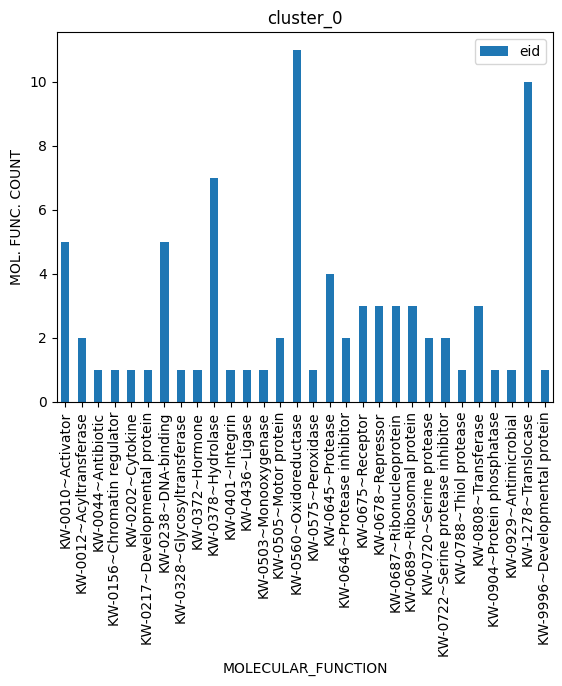

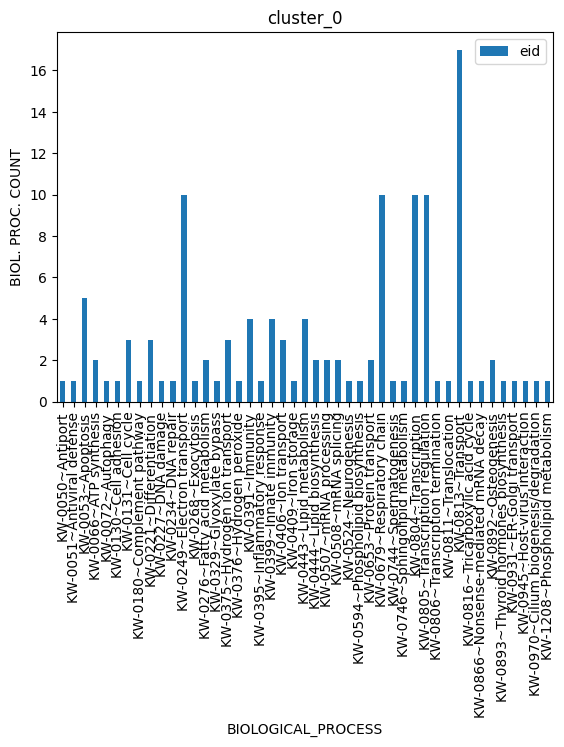

In [146]:
mdfs['cluster_0'][['eid', 'MOLECULAR_FUNCTION']].drop_duplicates().groupby(['MOLECULAR_FUNCTION']).count().plot(kind="bar", title="cluster_0", ylabel="MOL. FUNC. COUNT")
mdfs['cluster_0'][['eid', 'BIOLOGICAL_PROCESS']].drop_duplicates().groupby(['BIOLOGICAL_PROCESS']).count().plot(kind="bar", title="cluster_0", ylabel="BIOL. PROC. COUNT")